# Hierarchical Clustering in Practice

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import scipy as sp
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Synthetic data

We'll use the same synthetic data as we did in the k-means case -- ie.,
three "blobs" living in 30 dimensions.

In [2]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,
                          center_box=(-10.0, 10.0),random_state=0)

As a reminder of the raw data here is the visualization: first the raw data, then an embedding into 2-D (using MDS).

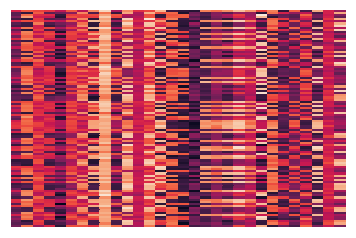

In [3]:
_ = sns.heatmap(X, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

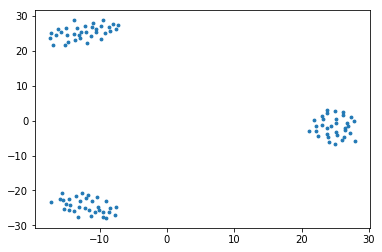

In [4]:
import sklearn.manifold
euclidean_dists = metrics.euclidean_distances(X)
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
_ = plt.scatter(pos[:, 0], pos[:, 1], s=8)

Hierarchical clustering is available in __sklearn__, but there is a much more fully developed set of tools in the __scipy__ package and that is the one to use.

In [5]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance
# linkages = ['single','complete','average','weighted']
Z = hierarchy.linkage(X,method='complete')

What is the output of a hierarchical clustering?

In [6]:
print(Z[:10,:])

[[ 81.          92.           4.74889973   2.        ]
 [ 54.          88.           4.75898726   2.        ]
 [ 29.          85.           4.82311157   2.        ]
 [ 24.          47.           4.96051963   2.        ]
 [ 67.          68.           5.02571505   2.        ]
 [ 20.          22.           5.13698512   2.        ]
 [ 10.          36.           5.16638985   2.        ]
 [ 40.          41.           5.21116397   2.        ]
 [ 65.          78.           5.33150835   2.        ]
 [ 76.          80.           5.36525041   2.        ]]


In [7]:
print(Z[-10:])

[[ 153.          178.            9.26355863   11.        ]
 [ 141.          182.            9.30177222   16.        ]
 [ 175.          179.            9.31642449   18.        ]
 [ 184.          188.            9.6787384    18.        ]
 [ 186.          189.            9.80533008   33.        ]
 [ 190.          192.            9.93838197   34.        ]
 [ 161.          191.            9.95702138   22.        ]
 [ 187.          195.           10.46869539   33.        ]
 [ 193.          196.           47.12293644   66.        ]
 [ 194.          197.           53.46812167  100.        ]]


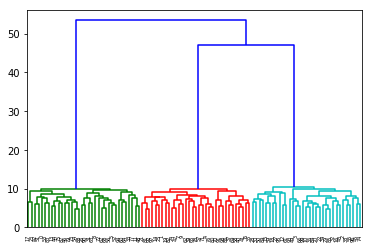

In [8]:
R = hierarchy.dendrogram(Z)

## Working with real data

Once again we'll use the "20 Newsgroup" data provided as example data in sklearn.

(http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [9]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data).todense()
data.shape

(1781, 9409)

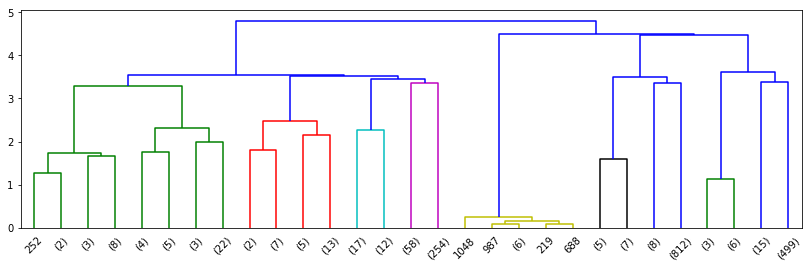

In [11]:
# metrics can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, 
# ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, 
# ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
# ‘sqeuclidean’, ‘yule’.
Z_20ng = hierarchy.linkage(data, method='ward', metric='euclidean')
plt.figure(figsize=(14,4))
R_20ng = hierarchy.dendrogram(Z_20ng, p=4, truncate_mode='level', show_leaf_counts=True)

### Selecting the Number of Clusters

In [12]:
clusters = hierarchy.fcluster(Z_20ng, 3, criterion='maxclust')
print(clusters.shape)
clusters

(1781,)


array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

Text(0,0.5,'Silhouette Score')

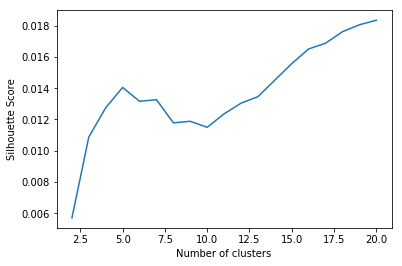

In [13]:
max_clusters = 20
s = np.zeros(max_clusters+1)
for k in range(2,max_clusters+1):
    clusters = hierarchy.fcluster(Z_20ng, k, criterion='maxclust')
    s[k] = metrics.silhouette_score(data,clusters,metric='euclidean')
plt.plot(range(2,len(s)),s[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')